# SVM

### Titanic

In [7]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Drop unnecessary columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# One-hot encode categoricals
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Split features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

C:\Users\USER\AppData\Local\Temp\ipykernel_2884\1714669618.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_2884\1714669618.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.svm import SVC

svm=SVC(kernel="rbf",C=1.0,gamma="scale",probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = svm.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[95 10]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212290502793296


### Letter Recognition

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("dataset/letter-recognition.csv")
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [13]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [14]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [15]:
X=df.drop("letter",axis=1)
y=df["letter"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

model=SVC(kernel="rbf", C=1.0, gamma="scale")

model.fit(X_train,y_train)
y_pred=model.predict(X_test)




In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


labels = sorted(y.unique())
cm=confusion_matrix(y_test, y_pred,labels=labels)
print(cm)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
    0   0   0   0   0   2   0   0]
 [  0   0   0   1  

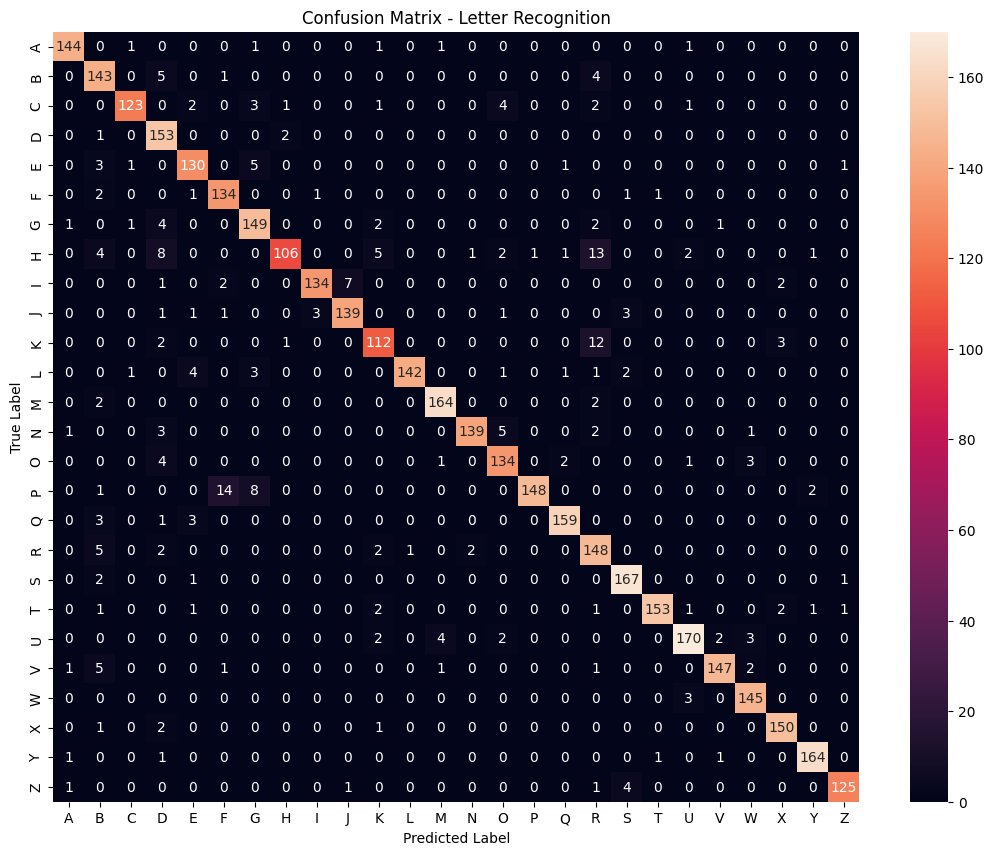

In [36]:


import seaborn as sns
plt.figure(figsize=(13,10))
sns.heatmap(cm,annot=True,fmt='g',xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Letter Recognition")
plt.show()

### Spam Classsification

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

df_spam=pd.read_csv("dataset/spam_classification_3col.csv")

df_spam["combined_text"]=df_spam["text_col_1"] + " " + df_spam["text_col_2"] + " " + df_spam["text_col_3"]

df_spam.head()

,text_col_1,text_col_2,text_col_3,label,combined_text
0,meeting schedule schedule discussion review,update meeting report meeting schedule,client meeting project review client,not_spam,meeting schedule schedule discussion review up...
1,money prize offer prize urgent,win free limited win offer,offer prize urgent prize credit,spam,money prize offer prize urgent win free limite...
2,reminder team client update review,update client discussion meeting schedule,schedule meeting schedule project schedule,not_spam,reminder team client update review update clie...
3,team team schedule schedule reminder,review review project discussion project,team reminder review client review,not_spam,team team schedule schedule reminder review re...
4,discussion schedule meeting team schedule,schedule reminder update team review,team reminder report schedule schedule,not_spam,discussion schedule meeting team schedule sche...


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df_spam["combined_text"], df_spam["label"], test_size=0.2, random_state=42
)

In [40]:
vectorizer=TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [43]:
svm = SVC(kernel="linear", C=1.0)
svm.fit(X_train_vec, y_train)


y_pred = svm.predict(X_test_vec)
print(classification_report(y_test, y_pred))


print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    not_spam       1.00      1.00      1.00        27
        spam       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy: 1.0


In [46]:

print(confusion_matrix(y_test, y_pred))
print("Unique labels in test set:", np.unique(y_test))

[[27  0]
 [ 0 33]]
Unique labels in test set: ['not_spam' 'spam']


In [47]:
# using count vectorizer insead of TF_IDF

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Convert text to numeric features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM (linear kernel is better for text)
svm_clf = SVC(kernel="linear", C=1.0, random_state=42)
svm_clf.fit(X_train_vec, y_train)

# Predictions
y_pred = svm_clf.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 33]]
Classification Report:
               precision    recall  f1-score   support

    not_spam       1.00      1.00      1.00        27
        spam       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

